In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
matplotlib.style.use('ggplot')

<h1 id="tocheading">Table of Contents</h1>
<div id="toc"></div>

In [2]:
%%javascript
$.getScript('misc/kmahelona_ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

# Getting and Knowing your Data

**Task:** load the following file as a data frame

In [3]:
fn = r"data/drinks.csv" 

In [4]:
# Answer:
df = pd.read_csv(fn, sep=",")

**Task:** See the first 10 entries

In [5]:
# Answer:
df.head(10)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,NaN
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU


**Task:** Which country has the highest alcohol consumption (total litres of pure alcohol)? 

In [6]:
# Answer
df.sort_values("total_litres_of_pure_alcohol", ascending=False).head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
15,Belarus,142,373,42,14.4,EU
98,Lithuania,343,244,56,12.9,EU
3,Andorra,245,138,312,12.4,EU
68,Grenada,199,438,28,11.9,NaN
45,Czech Republic,361,170,134,11.8,EU


# Groupby

**Task:** Which continent drinks most beer on average?

In [7]:
# Answer
# df.groupby("continent").beer_servings.mean()
# or 
df.groupby("continent")["beer_servings"].mean()

continent
AF     61.471698
AS     37.045455
EU    193.777778
OC     89.687500
SA    175.083333
Name: beer_servings, dtype: float64

**Task:** List all unique continents.

In [8]:
# Answer:
df["continent"].unique()

# or 
# set(df["continent"].tolist())

array(['AS', 'EU', 'AF', nan, 'SA', 'OC'], dtype=object)

**Task:** Which countries have missing values in the continent column?

In [9]:
# Answer:
df[df["continent"].isnull()]

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
5,Antigua & Barbuda,102,128,45,4.9,NaN
11,Bahamas,122,176,51,6.3,NaN
14,Barbados,143,173,36,6.3,NaN
17,Belize,263,114,8,6.8,NaN
32,Canada,240,122,100,8.2,NaN
41,Costa Rica,149,87,11,4.4,NaN
43,Cuba,93,137,5,4.2,NaN
50,Dominica,52,286,26,6.6,NaN
51,Dominican Republic,193,147,9,6.2,NaN
54,El Salvador,52,69,2,2.2,NaN


**Task:** Set "the" missing continent with a name of your choice.

In [10]:
# Answer:
df.loc[df["continent"].isnull(), "continent"] = "NAs"

**Task:** For each continent print "the" statistics (summary stats using "df.describe()") for wine consumption.

In [11]:
# Answer:
# df.groupby('continent').wine_servings.describe()

# or

df.groupby('continent')["wine_servings"].describe()

continent       
AF         count     53.000000
           mean      16.264151
           std       38.846419
           min        0.000000
           25%        1.000000
           50%        2.000000
           75%       13.000000
           max      233.000000
AS         count     44.000000
           mean       9.068182
           std       21.667034
           min        0.000000
           25%        0.000000
           50%        1.000000
           75%        8.000000
           max      123.000000
EU         count     45.000000
           mean     142.222222
           std       97.421738
           min        0.000000
           25%       59.000000
           50%      128.000000
           75%      195.000000
           max      370.000000
NAs        count     23.000000
           mean      24.521739
           std       28.266378
           min        1.000000
           25%        5.000000
           50%       11.000000
           75%       34.000000
           max      10

**Task:** Print the median alcoohol consumption per continent for every column

In [12]:
# Answer:
df.groupby('continent').median()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
AF,32.0,3.0,2.0,2.30
AS,17.5,16.0,1.0,1.20
EU,219.0,122.0,128.0,10.00
NAs,143.0,137.0,11.0,6.30
OC,52.5,37.0,8.5,1.75
SA,162.5,108.5,12.0,6.85


**Task:** Print the mean, min and max values for spirit consumption.

In [13]:
# Answer:
df.groupby('continent').spirit_servings.agg(['mean', 'min', 'max'])

,mean,min,max
continent,,,
AF,16.339623,0,152
AS,60.840909,0,326
EU,132.555556,0,373
NAs,165.739130,68,438
OC,58.437500,0,254
SA,114.750000,25,302


**Task:** GroupBy Continent and create a Boxplot. (Hint: using e.g. `figsize=(12, 9), rot=90` might help with legibility.)

AF          Axes(0.1,0.679412;0.363636x0.220588)
AS     Axes(0.536364,0.679412;0.363636x0.220588)
EU          Axes(0.1,0.414706;0.363636x0.220588)
NAs    Axes(0.536364,0.414706;0.363636x0.220588)
OC              Axes(0.1,0.15;0.363636x0.220588)
SA         Axes(0.536364,0.15;0.363636x0.220588)
dtype: object

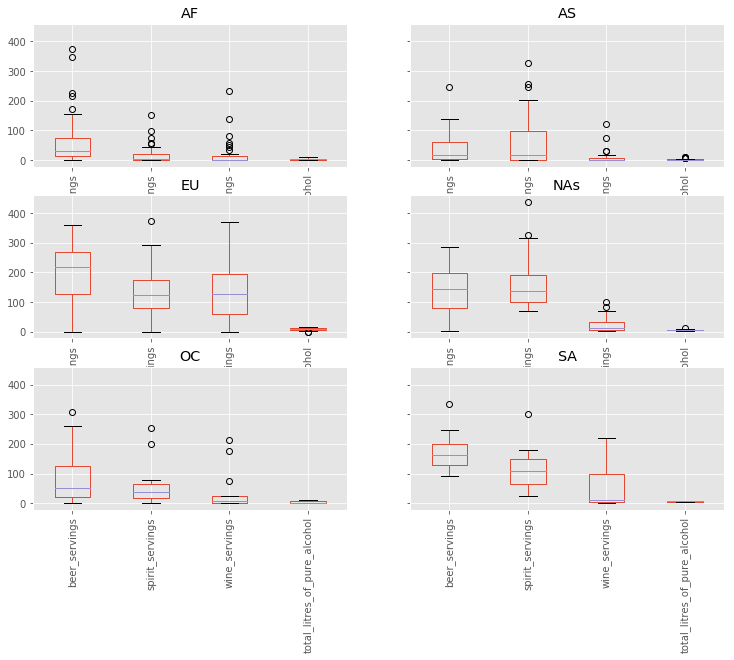

In [14]:
# Answer:
df.groupby("continent").boxplot(figsize=(12, 9), rot=90)

# Concatenate, Merge & Join

**Task:** Import the first dataset cars1 and cars2. Assign each to a to a variable called cars1 and cars2.

In [15]:
# Answer:
cars1 = pd.read_csv("data/cars1.csv")
cars2 = pd.read_csv("data/cars2.csv")

**Task:** It seems our first dataset has some unnamed blank columns, fix cars1.

In [16]:
# Answer:
cars1 = cars1.loc[:, "mpg":"car"]

**Task:** Join cars1 and cars2 into a single DataFrame called cars

In [17]:
# Answer:
cars = cars1.append(cars2)

# or
cars_ = pd.concat([cars1, cars2], axis=0)

# check for equality
cars_.equals(cars)

True

### Apply (interspersed)

**Task:** Create function that returns the first word of the string in the "car" column, the manufacturer name. Use the "apply" method to create a new column in the DataFrame.

In [18]:
# Answer
def grep_firt_word(string_):
    return string_.split()[0]
    
cars["vendor"] = cars["car"].apply(grep_firt_word)

# or

cars["vendor"] = cars["car"].apply(lambda s: s.split()[0])

Consider the following DataFrames for the next exercises

In [19]:
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                     'B': ['B0', 'B1', 'B2', 'B3'],
                     'C': ['C0', 'C1', 'C2', 'C3'],
                     'D': ['D0', 'D1', 'D2', 'D3']},
                     index=[0, 1, 2, 3])

df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                     'B': ['B4', 'B5', 'B6', 'B7'],
                     'C': ['C4', 'C5', 'C6', 'C7'],
                     'D': ['D4', 'D5', 'D6', 'D7']},
                      index=[4, 5, 6, 7])

df3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],
                     'B': ['B8', 'B9', 'B10', 'B11'],
                     'C': ['C8', 'C9', 'C10', 'C11'],
                     'D': ['D8', 'D9', 'D10', 'D11']},
                     index=[8, 9, 10, 11])

***Task:*** Concatenate the three DataFrames along the rows.

In [20]:
# Answer:
pd.concat([df1, df2, df3], axis=0)

# or

# df1.append(df2).append(df3)

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


***Task:*** How many missing values (NaNs) are produced if you concatenate along the other axis (appending the columns)?

In [21]:
# Answer
print sum(pd.concat([df1, df2, df3], axis=1).isnull().sum())

# or

shape1 = df1.shape
shape2 = df2.shape
shape3 = df3.shape
num_true_values = shape1[0]*shape1[1] + shape2[0]*shape2[1] + shape3[0]*shape3[1]
total_num_values = (shape1[0] + shape2[0] + shape3[0]) * (shape1[1] + shape2[1] + shape3[1])
print total_num_values - num_true_values

assert sum(pd.concat([df1, df2, df3], axis=1).isnull().sum()) == total_num_values - num_true_values

96
96


Let's consider another data set to do some more Merge, Join & Concatenate exerciseses

In [22]:
raw_data_1 = {
        'subject_id': ['1', '2', '3', '4', '5'],
        'first_name': ['Alex', 'Amy', 'Allen', 'Alice', 'Ayoung'], 
        'last_name': ['Anderson', 'Ackerman', 'Ali', 'Aoni', 'Atiches']}

raw_data_2 = {
        'subject_id': ['4', '5', '6', '7', '8', '9', '10'],
        'first_name': ['Alice', 'Ayoung', 'Bran', 'Bryce', 'Betty', 'Jane', np.nan], 
        'last_name': ['Aoni', 'Atiches', 'Balwner', 'Brice', 'Btisan', np.nan, 'Doe']}

raw_data_3 = {
        'subject_id': ['1', '2', '3', '4', '5', '7', '8', '9', '10', '11'],
        'test_id': [51, 15, 15, 61, 16, 14, 15, 1, 61, 16]}
data1 = pd.DataFrame(raw_data_1, columns = ['subject_id', 'first_name', 'last_name'])
data2 = pd.DataFrame(raw_data_2, columns = ['subject_id', 'first_name', 'last_name'])
data3 = pd.DataFrame(raw_data_3, columns = ['subject_id','test_id'])

**Task:** Join the two dataframes, `data1` and `data2`, along rows and assign `all_data`. Make sure that the row index is unique.

In [23]:
# Answer:
all_data = pd.concat([data1, data2], ignore_index=True)
assert len(set(all_data.index)) == all_data.shape[0]

# otherwise you might get unexpected behaviour:
all_data = pd.concat([data1, data2], ignore_index=False)
all_data.loc[0, :]

,subject_id,first_name,last_name
0,1,Alex,Anderson
0,4,Alice,Aoni


**Task:** Join the two dataframes, `data1` and `data2`, along columns and assing to `all_data_col`.

In [24]:
# Answer:
all_data_col = pd.concat([data1, data2], axis = 1)
all_data_col

,subject_id,first_name,last_name,subject_id,first_name,last_name
0,1,Alex,Anderson,4,Alice,Aoni
1,2,Amy,Ackerman,5,Ayoung,Atiches
2,3,Allen,Ali,6,Bran,Balwner
3,4,Alice,Aoni,7,Bryce,Brice
4,5,Ayoung,Atiches,8,Betty,Btisan
5,NaN,NaN,NaN,9,Jane,NaN
6,NaN,NaN,NaN,10,NaN,Doe


**Task:** Merge `all_data` and `data3` along the subject_id value.

In [25]:
# Answer:
pd.merge(all_data, data3)

,subject_id,first_name,last_name,test_id
0,1,Alex,Anderson,51
1,2,Amy,Ackerman,15
2,3,Allen,Ali,15
3,4,Alice,Aoni,61
4,4,Alice,Aoni,61
5,5,Ayoung,Atiches,16
6,5,Ayoung,Atiches,16
7,7,Bryce,Brice,14
8,8,Betty,Btisan,15
9,9,Jane,NaN,1


**Task:** How many test_ids have missing values in the first or last name column?

In [26]:
# Answer:
dfm = pd.merge(all_data, data3, how="outer")
cond = dfm["test_id"].notnull() & (dfm["first_name"].isnull() | dfm["last_name"].isnull())
sum(cond)

3

**Task:** Merge only the data that has the same 'subject_id' in both `data1` and `data2`.

In [27]:
# Answer:
pd.merge(data1, data2, how='inner')

,subject_id,first_name,last_name
0,4,Alice,Aoni
1,5,Ayoung,Atiches


# Transform

The transform method returns an object that is indexed the same (same size) as the one being grouped.

**Task:** Given a DataFrame with a column of group IDs, 'groups', and a column of corresponding integer values, 'vals', replace any negative values in 'vals' with the group mean.

In [28]:
df = pd.DataFrame([[1, 1], [1, -1], [2, 1], [2, 2]], columns=["groups", "vals"])
df

,groups,vals
0,1,1
1,1,-1
2,2,1
3,2,2


In [29]:
# Answer
def replace_within_group(group):
    mask = group < 0
    # Select those values where it is < 0, and replace
    # them with the mean of the values which are not < 0.
    group[mask] = group[~mask].mean() # "~" is the "invert" or "complement" operation
    return group

df.groupby(['groups'])['vals'].transform(replace_within_group)

0    1
1    1
2    1
3    2
Name: vals, dtype: int64

**Task:** Use groupby in conjunction with transform across multiple columns: We want to group by one to n columns and apply a function on these groups across two columns.
    1. Calculate the sum of `a` and `b` and assign it to a column named `e`.
    2. Group by 'c' and `d`, and calculate the sum of `e`

In [30]:
df = pd.DataFrame({'a':[1,2,3,4,5,6],
                   'b':[1,2,3,4,5,6],
                   'c':['q', 'q', 'q', 'q', 'w', 'w'],  
                   'd':['z','z','z','o','o','o']})

In [31]:
# Answer:
df['e'] = df['a'] + df['b']
df['f'] = (df.groupby(['c', 'd'])['e'].transform('sum'))

**Task:** Normalize (standardize) the data by calculating the z-score. Group the data by `year` and calculate the z-score per group. z = (value - mean) / standard_deviation
<div style="font-size: 150%;">  
$$z=\frac{x-\mu}{\sigma}$$
</div>

In [32]:
index = pd.date_range('10/1/1999', periods=1100)
ser = pd.Series(np.random.normal(0.5, 2, 1100), index=index)
ser = ser.rolling(window=100,min_periods=100).mean().dropna()

In [33]:
# Answer:
key = lambda x: x.year
zscore = lambda x: (x - x.mean()) / x.std()
transformed = ser.groupby(key).transform(zscore)

**Task:** We would expect the result to now have mean 0 and standard deviation 1 within each group, which we can easily check. Calculate the mean and standard deviation within each group.

In [34]:
# Answer:
grouped = transformed.groupby(key)
grouped.mean()
grouped.std()

2000    1.0
2001    1.0
2002    1.0
dtype: float64

**Task:** Visually compare the original and transformed data sets.

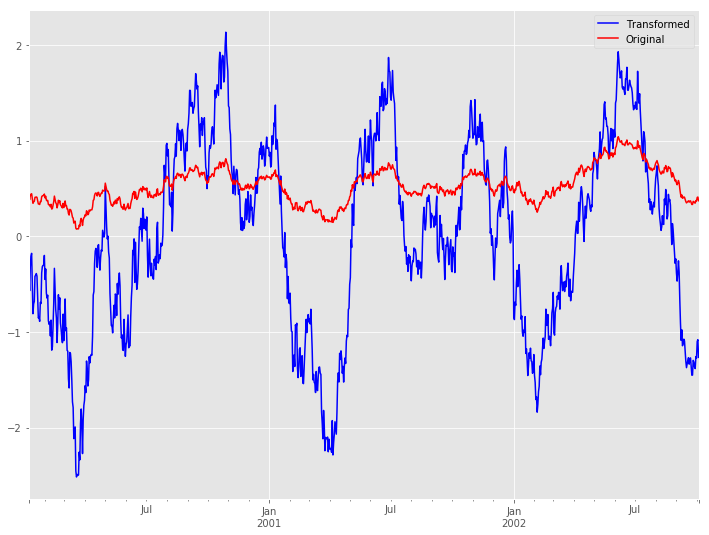

In [35]:
# Answer:
compare = pd.DataFrame({'Original': ser, 'Transformed': transformed}, columns=["Transformed", "Original"])
compare.plot(figsize=(12,9), color=["blue", "red"])

# Pivot

**Task:** Let's reshape this small example DataFrame of ICD10 codes. Each person has different code-associations. Only positive associations are listed. Transform (reshape) the DataFrame to a wide format (one column per code) that lists positive and negative (missing) associations as Booleans.

In [36]:
df = pd.DataFrame({"Person": ["a", "a", "a", "b", "c", "c"], "Code": ["D99", "E32", "A41", "D99", "D99", "A41"]}, columns=["Person", "Code"])
df

,Person,Code
0,a,D99
1,a,E32
2,a,A41
3,b,D99
4,c,D99
5,c,A41


In [37]:
# Answer:
df["Values"] = pd.Series([True]*df.shape[0])
dfp = df.pivot(index="Person", columns="Code", values="Values")
dfp = dfp.fillna(value=False)
dfp = dfp.reset_index()
dfp

Code,Person,A41,D99,E32
0,a,True,True,True
1,b,False,True,False
2,c,True,True,False


# Combine DataFrames

**Task:** In the *data/microbiome* subdirectory, there are 9 spreadsheets of microbiome data that was acquired from high-throughput RNA sequencing procedures, along with a 10th file that describes the content of each. Write code that imports each of the data spreadsheets and combines them into a single `DataFrame`, adding the identifying information from the metadata spreadsheet as columns in the combined `DataFrame`.

In [38]:
# Answer
metadata = pd.read_excel(r"data/microbiome/metadata.xls", sheetname='Sheet1')

chunks = []
for i in range(9):
    df_temp = pd.read_excel(r"data/microbiome/MID{0}.xls".format(i+1), 'Sheet 1', header=None, names=['Taxon', 'Count'])
    df_temp = df_temp.set_index("Taxon")
    df_temp.columns = ['Count']
    df_temp.index.name = 'Taxon'
    for colname in metadata.columns:
        df_temp[colname] = metadata.loc[i, colname]
    chunks.append(df_temp)

df = pd.concat(chunks)
df = df.reset_index()
df.head()

,Taxon,Count,BARCODE,GROUP,SAMPLE
0,"Archaea ""Crenarchaeota"" Thermoprotei Desulfuro...",7,MID1,EXTRACTION CONTROL,NaN
1,"Archaea ""Crenarchaeota"" Thermoprotei Desulfuro...",2,MID1,EXTRACTION CONTROL,NaN
2,"Archaea ""Crenarchaeota"" Thermoprotei Sulfoloba...",3,MID1,EXTRACTION CONTROL,NaN
3,"Archaea ""Crenarchaeota"" Thermoprotei Thermopro...",3,MID1,EXTRACTION CONTROL,NaN
4,"Archaea ""Euryarchaeota"" ""Methanomicrobia"" Meth...",7,MID1,EXTRACTION CONTROL,NaN


# GroupBy Titanic data

Load the dataset in `titanic.xls`. It contains data on all the passengers that travelled on the Titanic.

**Task:**
Women and children first?

1. Use the `groupby` method to calculate the proportion of passengers that survived by sex.
2. Calculate the same proportion, but by class and sex.
3. Create age categories: children (under 14 years), adolescents (14-20), adult (21-64), and senior(65+), and calculate survival proportions by age category, class and sex. Additionally, count the number of passengers per group.

In [39]:
# Answers
titanic = pd.read_excel("data/titanic.xls", "titanic")

# 1.
# explicit version
# titanic.groupby('sex')['survived'].agg("mean")
# or short version
titanic.groupby('sex')['survived'].mean()

# 2.
titanic.groupby(['pclass','sex'])['survived'].mean()

# 3.
titanic['agecat'] = pd.cut(titanic.age, [0, 13, 20, 64, 100], labels=['child', 'adolescent', 'adult', 'senior'])
titanic.groupby(['agecat', 'pclass','sex'])['survived'].mean()
titanic.groupby(['agecat', 'pclass','sex'])['survived'].agg(["mean", "count"])

mean  count
agecat     pclass sex                    
child      1      female  0.000000      1
                  male    1.000000      5
           2      female  1.000000     14
                  male    1.000000     11
           3      female  0.483871     31
                  male    0.324324     37
adolescent 1      female  1.000000     15
                  male    0.200000      5
           2      female  0.923077     13
                  male    0.117647     17
           3      female  0.542857     35
                  male    0.125000     64
adult      1      female  0.965517    116
                  male    0.343284    134
           2      female  0.868421     76
                  male    0.078125    128
           3      female  0.441860     86
                  male    0.159184    245
senior     1      female  1.000000      1
                  male    0.142857      7
           2      male    0.000000      2
           3      male    0.000000      3

Let's plot the number of survivors grouped by sex and passenger class.

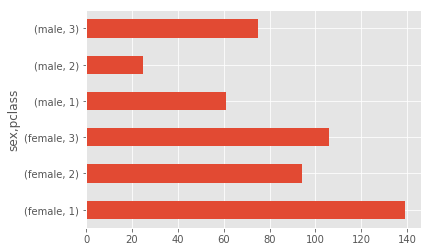

In [40]:
titanic.groupby(['sex','pclass'])["survived"].sum().plot(kind='barh')

**Task:** Let's also look at the deaths (and not only at the survivors) within the groups and create a stacked Barplot of survivers vs. deaths grouped by sex and passenger-class (as before).
1. Convert the "survived" column to boolean values
2. Compute the cross tabulation (a.k.a. contingency table) of passenger-class and sex vs. survived. Assign the result to the variable name "death_counts" --> checkout pd.crosstab()
3. Create a stacked barplot of the computed death_counts

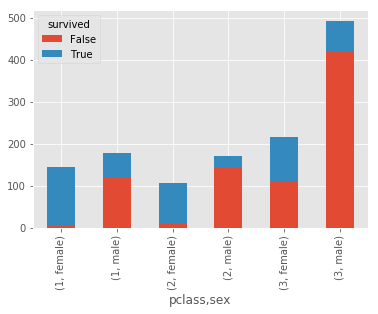

In [41]:
# Answer
# 1.
titanic.survived = titanic.survived.astype(bool)

# 2.
death_counts = pd.crosstab([titanic.pclass, titanic.sex], titanic.survived)

# 3.
death_counts.plot(kind='bar', stacked=True)

**Task:** Another way of comparing the groups is to look at the survival rate, by adjusting for the number of people in each group.
Create a stacked, horizontal Barplot of the adjusted death counts
1. Sum the death_counts per passenger-class and sex, and convert to data type float (for Python 2.x division purposes).
2. Compute the adjusted survival rate by dividing the death_counts by the result from 1. 
3. Plot a stacked, horizontal Barplot from the result of 3.

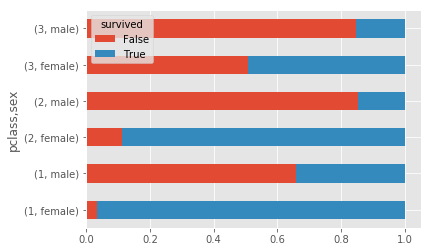

In [42]:
# Answer

# 1.
sum_death_counts = death_counts.sum(axis=1).astype(float)

# 2. 
adjusted_death_counts = death_counts.div(sum_death_counts, axis=0)

# 3.
adjusted_death_counts.plot(kind='barh', stacked=True)

# or in short:
# death_counts.div(death_counts.sum(1).astype(float), axis=0).plot(kind='barh', stacked=True)